<h1 align="center">Walmart Demand Forecasting</h1>

<h4 align="center">Domain: Demand Forecasting</h4>

**Dataset Name**: Walmart Dataset

**Description**: This dataset provides historical sales data for 45 Walmart stores located in different regions. The dataset covers 2010-02-05 to 2012-11-01 and includes various economic factors and holiday information that might affect sales. Walmart seeks to improve sales and demand prediction accuracy using machine learning. Key challenges include modeling the impact of promotional markdown events preceding major holidays like the Super Bowl, Labor Day, Thanksgiving, and Christmas, which significantly influence sales. The dataset aims to enhance forecasting capabilities amidst fluctuating demand and economic conditions.

**Source**: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/yasserh/walmart-dataset/data)

**Objective**: The goal of this analysis is to understand the key factors that influence sales at Walmart stores and to develop a model that accurately predicts future sales. This model can help Walmart optimize inventory management, staffing, and marketing strategies.

## Explanation of Each Column:

| Column Name       | Description                                              | Data Type | Notes                               |
|-------------------|----------------------------------------------------------|-----------|-------------------------------------|
| Store             | Unique identifier for each store                         | Integer | Distinguishes sales data across different Walmart stores |
| Date              | Date of the sales data                                   | Object to be converted to datetime64[ns]  | Indicates the week of sales |
| Weekly_Sales      | Sales recorded for the given store for that week | Float | Target variable for the predictive model |
| Holiday_Flag         | Indicator for whether the week includes a major holiday  | Integer | Affects sales patterns 1=Holiday week 0=Non-hoiday week|
| Temperature       | Average temperature for the region during that week      | Float | Provides insights into how weather conditions impact sales |
| Fuel_Price        | Cost of fuel in the region for that week                 | Float | Can influence consumer spending behavior |
| CPI               | Consumer Price Index                                     | Float | Represents the relative cost of consumer goods and services, impacting purchasing power |
| Unemployment      | Unemployment rate in the region for that week            | Float | Higher unemployment rates might negatively affect sales |
| Year          | Year of the sales data                                   | Integer   | Extracted from the Date column after conversion |
| Month         | Month of the sales data                                  | Integer   | Extracted from the Date column after conversion |
| Day           | Day of the sales data                                    | Integer   | Extracted from the Date column after conversion |
| WeekOfYear    | ISO week date system: week number of the sales data                        | Integer   | Extracted from the Date column after conversion |

###Visual inspection of the data

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.read_csv('Walmart.csv')

# Information about DataFrame size
num_rows, num_columns = df.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

The DataFrame has 6435 rows and 8 columns.


In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


###Exploratory Data Analysis (EDA)

In [ ]:
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Dataframe Information
print("Dataframe Information:")
print(df.info())
print()

# Date is 2010-02-05 object-we need to convert it to datetime format in order to extract later
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # converts object(string) format to datetime format
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Dataframe Information check after date conversion
print("Dataframe Information with Date converted:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum().sum()  # Total number of missing values in the DataFrame
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()

#Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found in the DataFrame:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the DataFrame.")
print()

# Check for unique values (Store and Holiday_Flag expected to have unique identifier; Year, Month, day, WeekOfYear derived from Date
# are used for time-series analysis, trends, patterns, etc so need to ensure uniqueness here. Other columns are
# continuous or categorical that do not require unique check)
columns_to_check_unique = ['Store', 'Holiday_Flag','Year', 'Month', 'Day', 'WeekOfYear']
for col in columns_to_check_unique:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print()

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Check for outliers - numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Using IQR method for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers according to IQR method.")
print()


Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

Dataframe Information with Date converted:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  64

#####**Descriptive Statistics summary:**
---
Store has a mean of 23 suggesting the dataset covers a range of stores with each contributing around the same on average. It is a distribution that indicates the sales data is fairly represented across the 45 stores that are included.

Outcome variable: Weekly_Sales has a mean ~1,046,965 dollars with a standard deviation of ~$564,366. The range is 209,986-3,818,686 suggesting a broad range of variability/weekly sales. The diversity here across the different weeks may be influenced by other factors.

Holiday_Flag shows a mean of ~7% of sales are conducted on a holiday with a low .255 standard deviation which implies it is consistent but somewhat of a minor impact on sales compared to the non-holiday weeks.

Temperature and Economic factors: The average temperature is ~60.66 degrees and may help in understanding seasonal variations in consumer behiavior and/or sales patterns. Fuel_Price has a mean of ~3.36, CPI is ~171.58, Unemployment ~8.

Date Components: Month, Day and WeekOfYear suggests the average peak sales are around mid June, the 25th week of the year.


#####**Outliers**
---

Column 'Weekly_Sales' has 34 outliers according to IQR method.<br>
Column 'Holiday_Flag' has 450 outliers according to IQR method.<br>
Column 'Temperature' has 3 outliers according to IQR method.<br>
Column 'Unemployment' has 481 outliers according to IQR method.<br>
We will look to reason and plot:


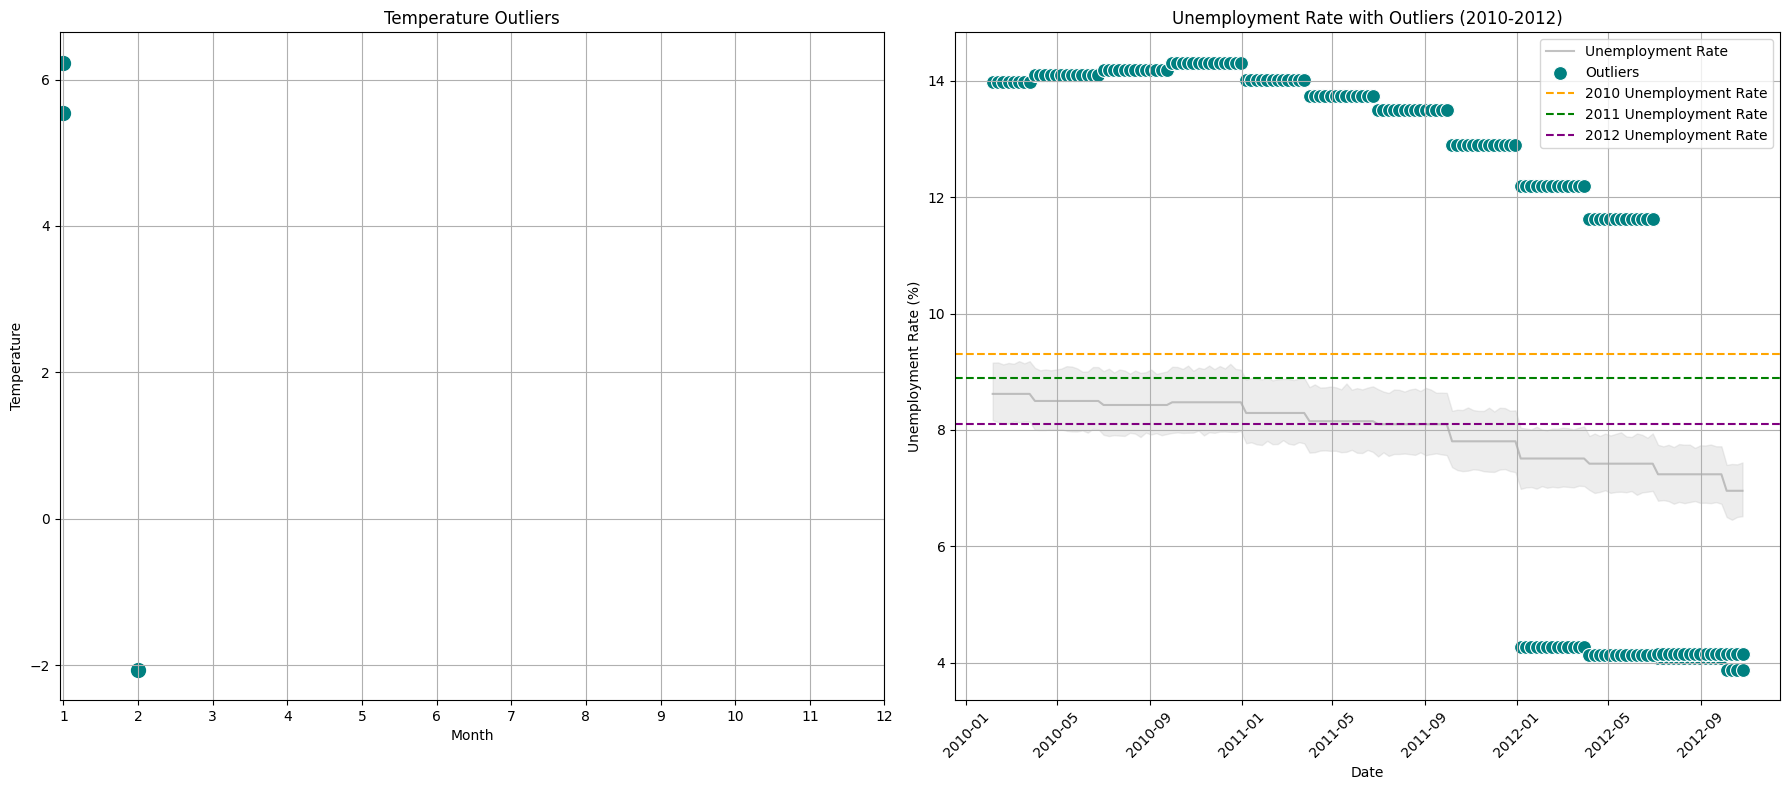

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter outliers in the Temperature column using IQR method
Q1_temp = df['Temperature'].quantile(0.25)
Q3_temp = df['Temperature'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

temperature_outliers = df[(df['Temperature'] < lower_bound_temp) | (df['Temperature'] > upper_bound_temp)]

# Filter outliers in the Unemployment column using IQR method
Q1_unemployment = df['Unemployment'].quantile(0.25)
Q3_unemployment = df['Unemployment'].quantile(0.75)
IQR_unemployment = Q3_unemployment - Q1_unemployment
lower_bound_unemployment = Q1_unemployment - 1.5 * IQR_unemployment
upper_bound_unemployment = Q3_unemployment + 1.5 * IQR_unemployment

unemployment_outliers = df[(df['Unemployment'] < lower_bound_unemployment) | (df['Unemployment'] > upper_bound_unemployment)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plotting the temperature outliers
ax1.scatter(temperature_outliers['Month'], temperature_outliers['Temperature'], color='#008080', marker='o', s=100)  # Teal color
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature Outliers')
ax1.grid(True)
ax1.set_xticks(range(1, 13))

# Plotting the unemployment outliers
sns.lineplot(data=df, x='Date', y='Unemployment', label='Unemployment Rate', color='#A9A9A9', alpha=0.7, ax=ax2)  # Grey color
sns.scatterplot(data=unemployment_outliers, x='Date', y='Unemployment', color='#008080', label='Outliers', s=100, ax=ax2)  # Pale lavender color

# Mark significant periods based on historical data
ax2.axhline(y=9.3, color='orange', linestyle='--', label='2010 Unemployment Rate')
ax2.axhline(y=8.9, color='green', linestyle='--', label='2011 Unemployment Rate')
ax2.axhline(y=8.1, color='purple', linestyle='--', label='2012 Unemployment Rate')

ax2.set_xlabel('Date')
ax2.set_ylabel('Unemployment Rate (%)')
ax2.set_title('Unemployment Rate with Outliers (2010-2012)')
ax2.legend()
ax2.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


#####**Outliers**
---

Column 'Temperature' has 3 outliers we will keep. It is reasonable that some months are colder year to year and these 3 outliers are showing up in January and February.

Column 'Unemployment' has 481 outliers. According to [statista.com](https://www.statista.com/statistics/193290/unemployment-rate-in-the-usa-since-1990/) there was high unemployment rate during the time of this dataset of:
2010 9.3%, 2011 8.9%, 2012 8.1%. Given that the period (2010-02-05 to 2012-11-01) includes years with high unemployment rates, a large number of outliers might reflect genuine economic conditions rather than errors. We will keep the outliers to preserve data integrity and complexity of the dataset as they may provide insights into unusual or significant economic events or trends needed for analysis.


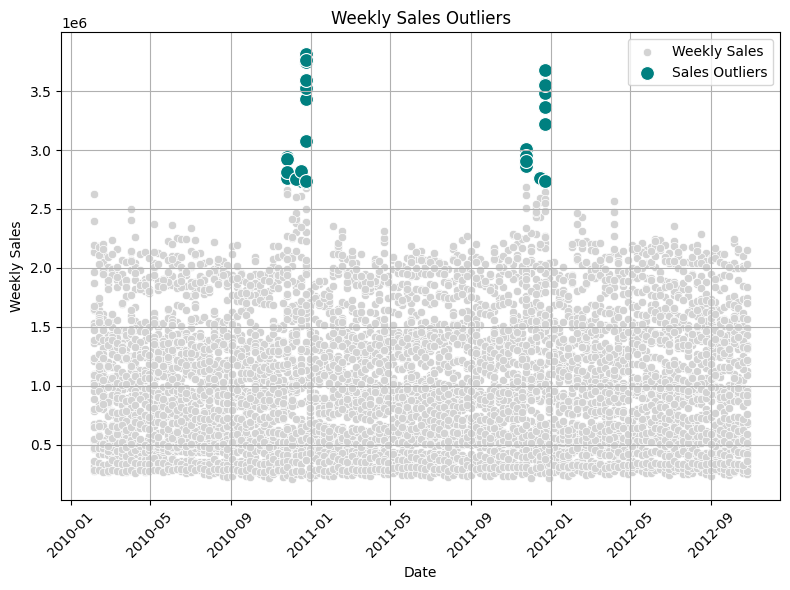

In [ ]:
# 'Weekly_Sales' column
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper bound for outliers based on IQR
upper_bound_sales = Q3 + 1.5 * IQR

# Filtering outliers in weekly sales
sales_outliers = df[df['Weekly_Sales'] > upper_bound_sales]

# Plotting only the Weekly Sales outliers
plt.figure(figsize=(8, 6))

# Plot all Weekly Sales data
sns.scatterplot(x='Date', y='Weekly_Sales', data=df, color='lightgray', label='Weekly Sales')

# Plotting outliers in teal
sns.scatterplot(x='Date', y='Weekly_Sales', data=sales_outliers, color='teal', label='Sales Outliers', s=100)

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Outliers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#####**Outliers**
---

Column 'Weekly_Sales' has 34 outliers that appear to be tied to the Thanksgiving/Christmas shopping season in November/December suggesting this is when sales spike and are to be expected. This reinforces the known that weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. For this reason, we will keep the outliers.

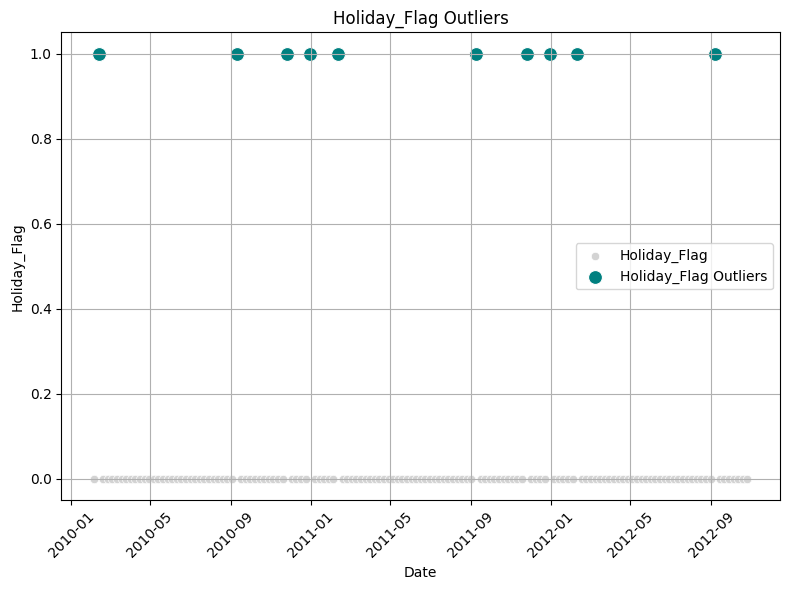

Number of outliers in Holiday_Flag: 450
Percentage of outliers in Holiday_Flag: 6.99%


In [ ]:
# Calculate outliers based on IQR method for 'Holiday_Flag'
Q1 = df['Holiday_Flag'].quantile(0.25)
Q3 = df['Holiday_Flag'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers for 'Holiday_Flag'
holiday_flag_outliers = df[(df['Holiday_Flag'] < (Q1 - 1.5 * IQR)) | (df['Holiday_Flag'] > (Q3 + 1.5 * IQR))]

# Plotting outliers in Holiday_Flag column
plt.figure(figsize=(8, 6))

# Plot all data points
sns.scatterplot(x='Date', y='Holiday_Flag', data=df, color='lightgray', label='Holiday_Flag')

# Plot outliers
sns.scatterplot(x='Date', y='Holiday_Flag', data=holiday_flag_outliers, color='teal', label='Holiday_Flag Outliers', s=100)

plt.xlabel('Date')
plt.ylabel('Holiday_Flag')
plt.title('Holiday_Flag Outliers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print statistical summary and insights
print("Number of outliers in Holiday_Flag:", len(holiday_flag_outliers))
percentage_outliers = len(holiday_flag_outliers) / len(df) * 100
print("Percentage of outliers in Holiday_Flag: {:.2f}%".format(percentage_outliers))

#####**Outliers**
---


Column 'Holiday_Flag' has 450 outliers. The 6.99% of outliers in Holiday_Flag indicates a small proportion to the total dataset. This suggests they may represent specific events or conditions and will be kept at this time.

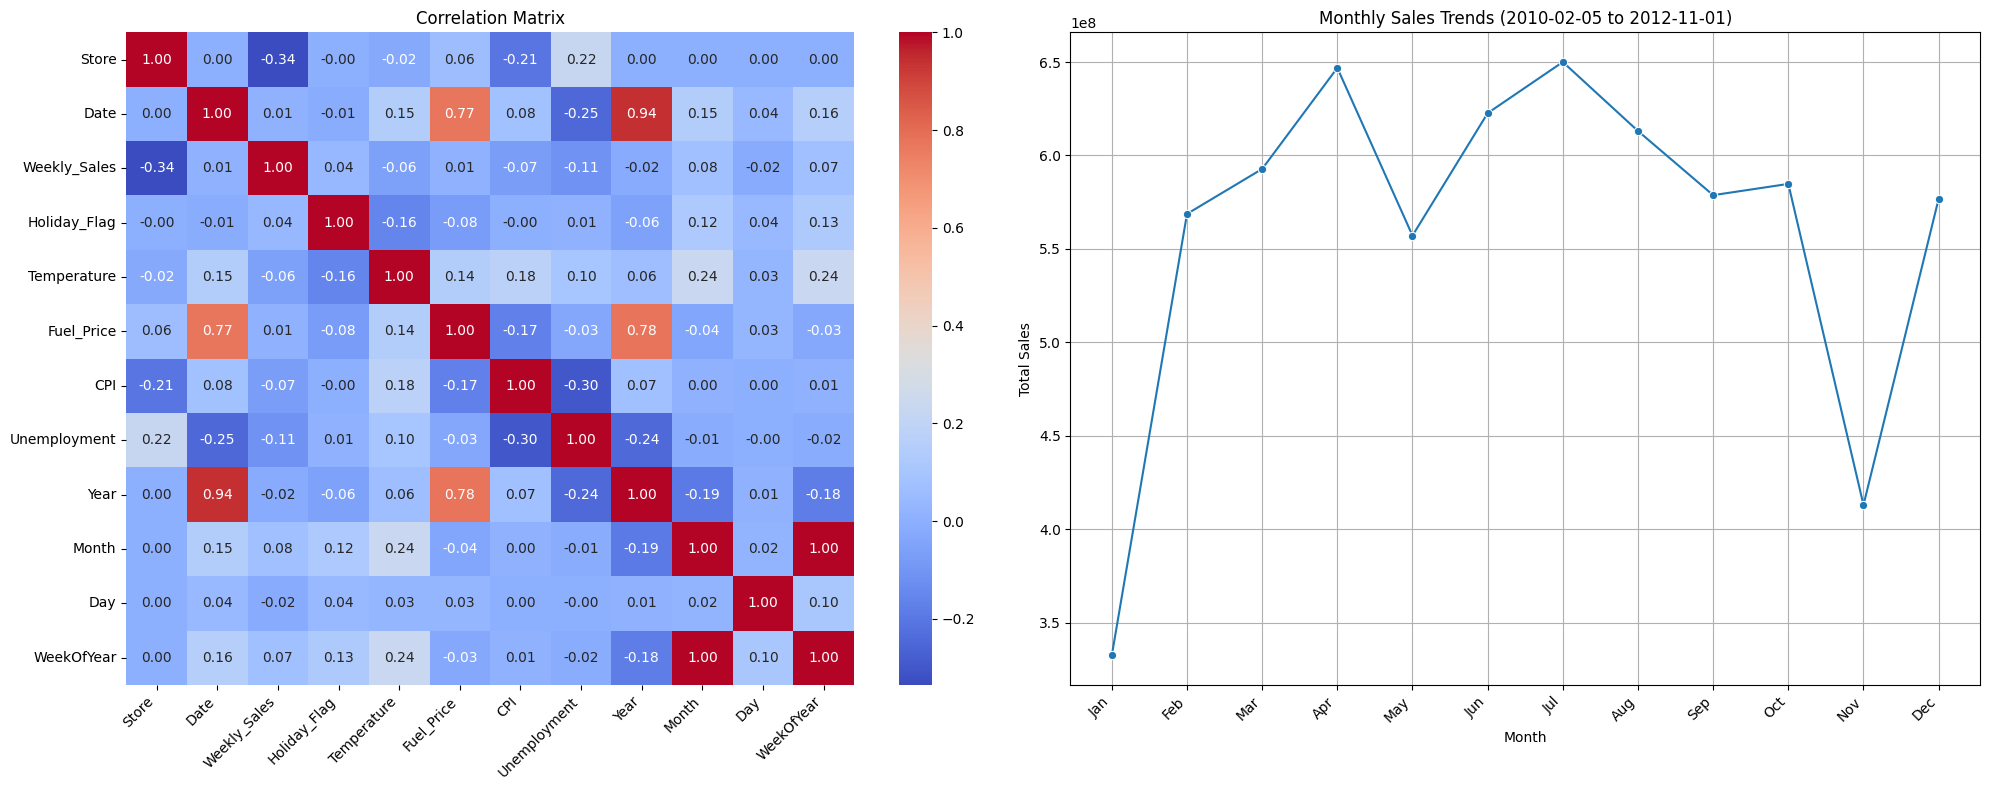

Correlation Summaries:
Fuel_Price and Date: There is a high correlation (0.7714).
Year and Date: There is a high correlation (0.9417).
Year and Fuel_Price: There is a high correlation (0.7795).
WeekOfYear and Month: There is a high correlation (0.9960).

Variance for each numeric column:
Store           1.686929e+02
Weekly_Sales    3.185097e+11
Holiday_Flag    6.504996e-02
Temperature     3.402155e+02
Fuel_Price      2.106991e-01
CPI             1.548951e+03
Unemployment    3.518944e+00
dtype: float64


In [ ]:
# Correlation matrix visualization
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))  # Adjust figsize as needed
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix')

# Monthly sales trends visualization
plt.subplot(1, 2, 2)
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends (2010-02-05 to 2012-11-01)')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Define thresholds for interpreting correlations
moderate_corr_threshold = 0.5
high_corr_threshold = 0.7

# Function to summarize correlations
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()  # To keep track of visited pairs
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:  # Exclude self-correlation (diagonal elements)
                pair = tuple(sorted([row, col]))  # Sort pair to avoid duplicate output
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]  # Access correlation value
                    if abs(correlation) >= high_corr_threshold:
                        print(f"{row} and {col}: There is a high correlation ({correlation:.4f}).")
                    elif abs(correlation) >= moderate_corr_threshold:
                        print(f"{row} and {col}: There is a moderate correlation ({correlation:.4f}).")

# Print correlation summaries
summarize_correlations(correlation_matrix)
print()

# Variance
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate variance for each numeric column
variances = df[numeric_cols].var()

# Print or inspect the variances
print("Variance for each numeric column:")
print(variances)

#####**Correlation Summaries at this point:**
---

Fuel_Price and Date: There is a high correlation (0.7714).<br>
Year and Date: There is a high correlation (0.9417).<br>
Year and Fuel_Price: There is a high correlation (0.7795).<br>
WeekOfYear and Month: There is a high correlation (0.9960).<br>

Sales Trends: Peak in April and July. May be seasonal crucial for planning inventory, promotions, staffing during this time, or it may not as our 2010 data does not include January and our 2012 does not include December.

#####**Variance:**
---

High variance: CPI at 1548.95 suggests significant variability across the dataset and that consumer prices vary widely across time or regions. Weekly_Sales has a high variance showing a possible wide range of weekly sales and that they may vary from week to week or store to store.

Low variance: Holiday_Flag at .065 reflects little variability and consistent values.

Moderate variance: The remainder show a moderate outcome reflecting varying significance across the dataset.

**Investigate per year where and when the most sales occur.** This is conducted because in the dataset 2010 does not include January, and 2012 does not include December.

No dates categorized as Unknown.


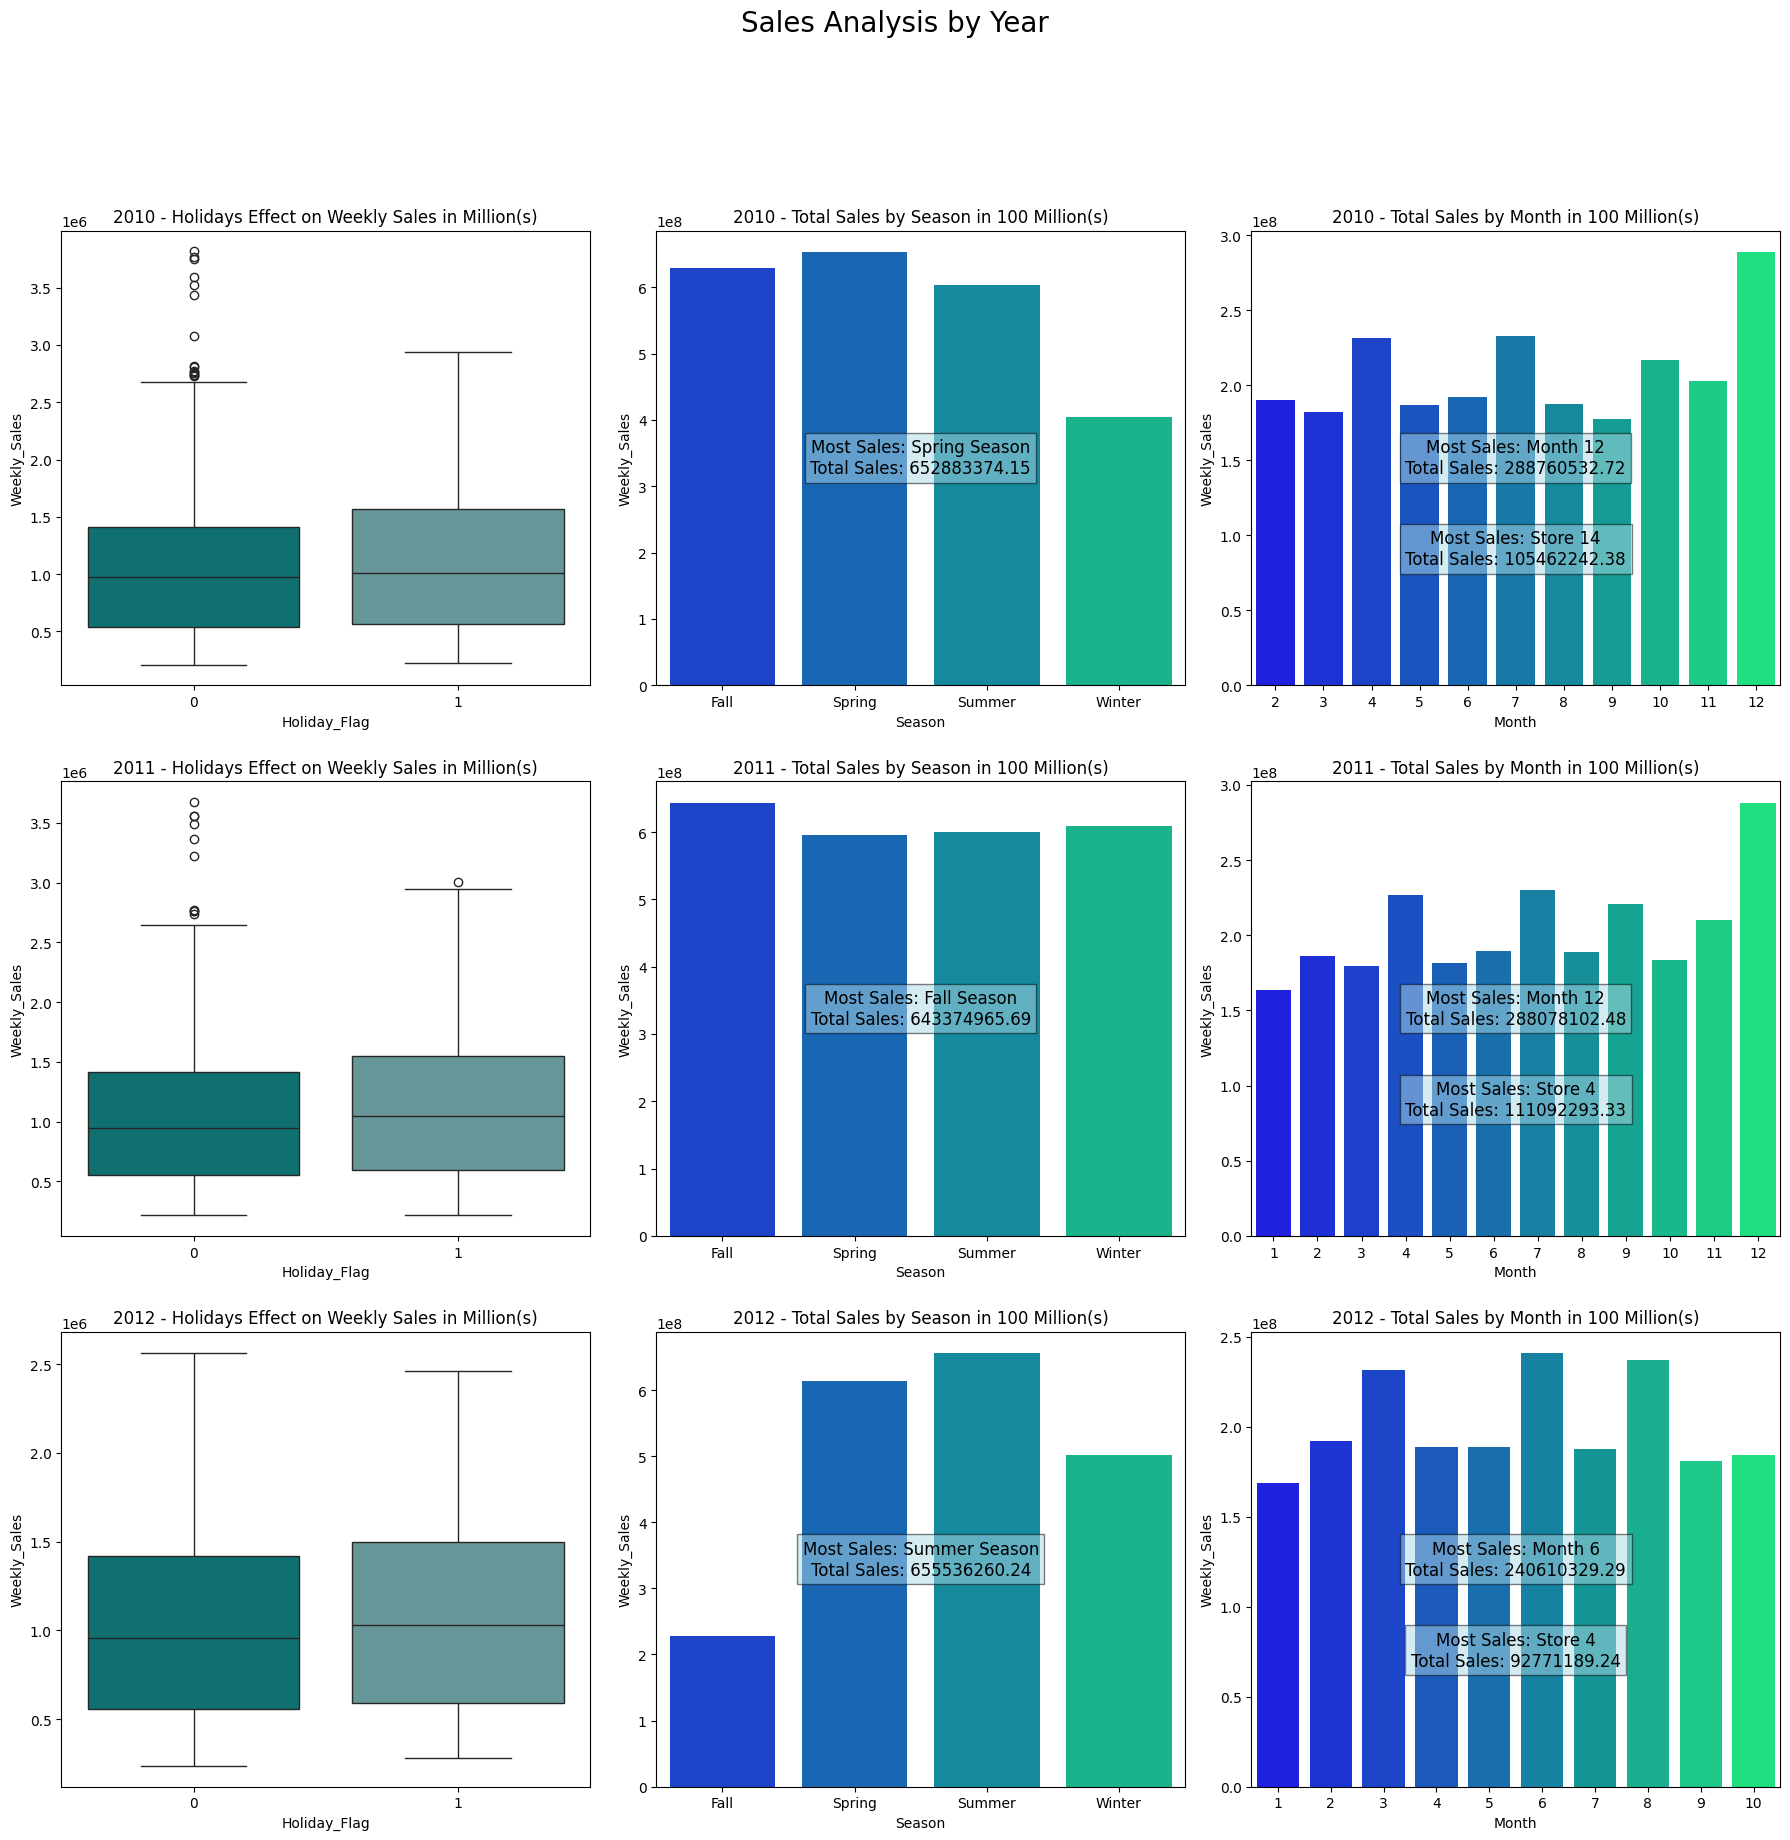

Year 2010 Analysis:
1. Holidays affect weekly sales, with the average sales during holidays being 1112358.88 compared to 1054879.56 on non-holidays.
2. The season with the most sales is Spring with total sales of 652883374.15.
3. The month with the most sales is 12 with total sales of 288760532.72.
4. The store with the most sales is Store 14 with total sales of 105462242.38.


Year 2011 Analysis:
1. Holidays affect weekly sales, with the average sales during holidays being 1148530.48 compared to 1037715.06 on non-holidays.
2. The season with the most sales is Fall with total sales of 643374965.69.
3. The month with the most sales is 12 with total sales of 288078102.48.
4. The store with the most sales is Store 4 with total sales of 111092293.33.


Year 2012 Analysis:
1. Holidays affect weekly sales, with the average sales during holidays being 1092660.75 compared to 1030782.33 on non-holidays.
2. The season with the most sales is Summer with total sales of 655536260.24.
3. The month w

In [ ]:
# Extract additional time-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day_name()

# Function to categorize seasons based on the specific date ranges
# Spring is 3/19 to 6/20, summer is 6/20-9/22, fall is 9/22 to 12/21, winter is 12/21 to 3/20
def get_season(date):
    # Define date ranges for each season
    if pd.Timestamp(date.year, 3, 19) <= date <= pd.Timestamp(date.year, 6, 20):
        return 'Spring', date
    elif pd.Timestamp(date.year, 6, 21) <= date <= pd.Timestamp(date.year, 9, 21):
        return 'Summer', date
    elif pd.Timestamp(date.year, 9, 22) <= date <= pd.Timestamp(date.year, 12, 20):
        return 'Fall', date
    else:
        return 'Winter', date

# Apply get_season to each row in the DataFrame
seasons_dates = df['Date'].apply(get_season).tolist()
df[['Season', 'Date']] = pd.DataFrame(seasons_dates, columns=['Season', 'Date'])

# Print out any dates categorized as 'Unknown'
unknown_dates = df[df['Season'] == 'Unknown']['Date'].tolist()
if unknown_dates:
    print("Dates categorized as Unknown:")
    for date in unknown_dates:
        print(date)
else:
    print("No dates categorized as Unknown.")

# Display the DataFrame to verify the 'Season' column and additional features
# print(df)

# Create a 3x3 grid for all visualizations
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Sales Analysis by Year', fontsize=20, y=1.02)

# Plotting functions for each year
def plot_yearly_data(year, ax, index):
    yearly_data = df[df['Year'] == year]

    # Holidays effect on weekly sales
    sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=yearly_data, hue='Holiday_Flag', palette=['#008080', '#5f9ea0'], ax=ax[index][0])
    ax[index][0].set_title(f'{year} - Holidays Effect on Weekly Sales in Million(s)')
    ax[index][0].set_xlabel('Holiday_Flag')  # Set x-axis label instead of setting tick labels
    if ax[index][0].legend_ is not None:
        ax[index][0].legend_.remove()

    # Sales by Season
    season_sales = yearly_data.groupby('Season')['Weekly_Sales'].sum().reset_index()
    max_season = season_sales.loc[season_sales['Weekly_Sales'].idxmax()]
    sns.barplot(x='Season', y='Weekly_Sales', data=season_sales, hue='Season', palette='winter', ax=ax[index][1])
    ax[index][1].set_title(f'{year} - Total Sales by Season in 100 Million(s)')
    if ax[index][1].legend_ is not None:
        ax[index][1].legend_.remove()
    ax[index][1].text(0.5, 0.5, f'Most Sales: {max_season["Season"]} Season\nTotal Sales: {max_season["Weekly_Sales"]:.2f}', ha='center', va='center', transform=ax[index][1].transAxes, fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))

    # Sales by Month
    month_sales = yearly_data.groupby('Month')['Weekly_Sales'].sum().reset_index()
    max_month = month_sales.loc[month_sales['Weekly_Sales'].idxmax()]
    sns.barplot(x='Month', y='Weekly_Sales', data=month_sales, hue='Month', palette='winter', ax=ax[index][2])
    ax[index][2].set_title(f'{year} - Total Sales by Month in 100 Million(s)')
    if ax[index][2].legend_ is not None:
        ax[index][2].legend_.remove()
    ax[index][2].text(0.5, 0.5, f'Most Sales: Month {int(max_month["Month"])}\nTotal Sales: {max_month["Weekly_Sales"]:.2f}', ha='center', va='center', transform=ax[index][2].transAxes, fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))

    # Store with most sales
    store_sales = yearly_data.groupby('Store')['Weekly_Sales'].sum().reset_index()
    max_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]
    ax[index][2].text(0.5, 0.3, f'Most Sales: Store {int(max_store["Store"])}\nTotal Sales: {max_store["Weekly_Sales"]:.2f}', ha='center', va='center', transform=ax[index][2].transAxes, fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))

# Plot for each year in different rows
plot_yearly_data(2010, axs, 0)
plot_yearly_data(2011, axs, 1)
plot_yearly_data(2012, axs, 2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Analysis in sentence form for each year
for year in [2010, 2011, 2012]:
    yearly_data = df[df['Year'] == year]

    holiday_effect = yearly_data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
    season_sales = yearly_data.groupby('Season')['Weekly_Sales'].sum().sort_values(ascending=False)
    month_sales = yearly_data.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False)

    store_sales = yearly_data.groupby('Store')['Weekly_Sales'].sum().reset_index()
    max_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]

    print(f"Year {year} Analysis:")
    print(f"1. Holidays affect weekly sales, with the average sales during holidays being {holiday_effect[1]:.2f} compared to {holiday_effect[0]:.2f} on non-holidays.")
    print(f"2. The season with the most sales is {season_sales.index[0]} with total sales of {season_sales.iloc[0]:.2f}.")
    print(f"3. The month with the most sales is {month_sales.index[0]} with total sales of {month_sales.iloc[0]:.2f}.")
    print(f"4. The store with the most sales is Store {int(max_store['Store'])} with total sales of {max_store['Weekly_Sales']:.2f}.")
    print("\n")


Despite the absence of January 2010 and December 2012 data:

There is an overall observed effect of holidays on weekly sales. In broader trends, Spring, Fall and Summer are the peak seasons. There are historical sales in December 2010 and 2011; the absence of December 2012 in the dataset should not negatively impact the general understanding of seasonal sales peak during this month. Store 14 in 2010 and Store 4 in 2011 and 2012 is a valid observation despite missing months. It helps to identify high performing stores for either focusing resources or identifying success factors at the stores.

**Histograms and Plots:**

Holiday_flag (1 and 0), and derived time variables (Year, Month, Day, WeekOfYear).

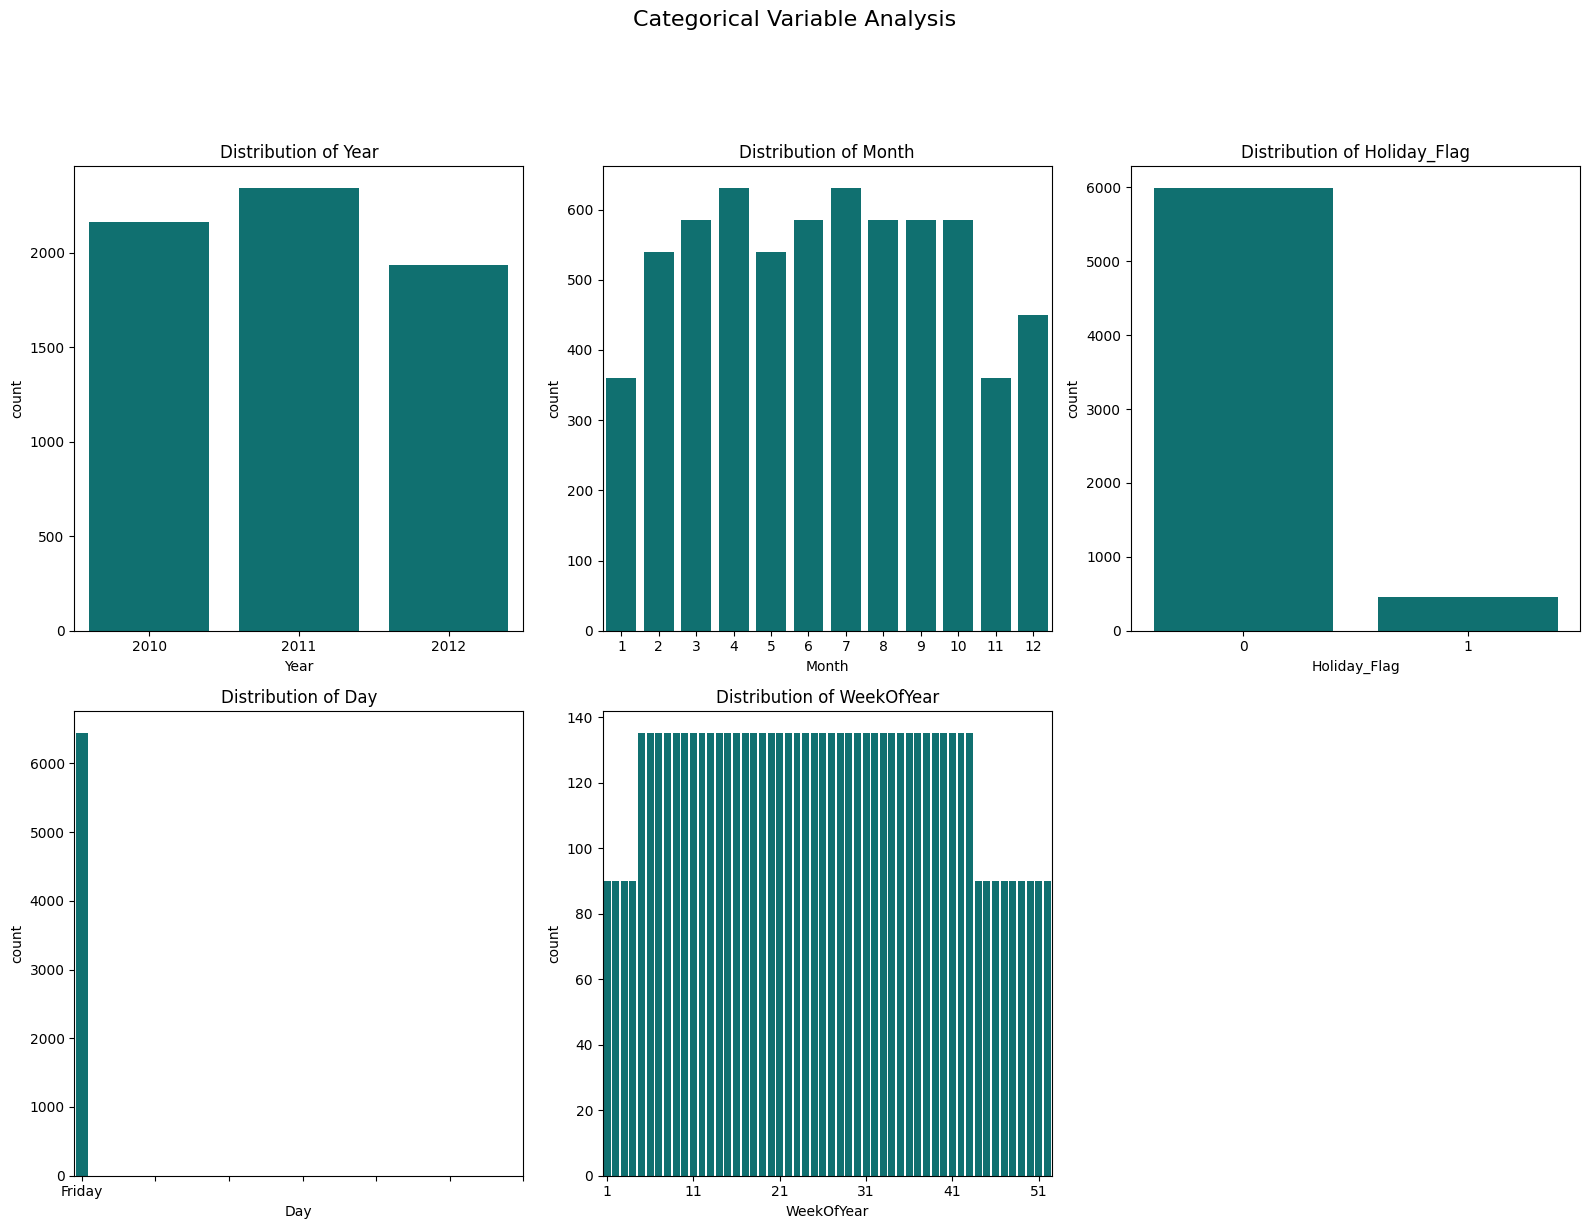

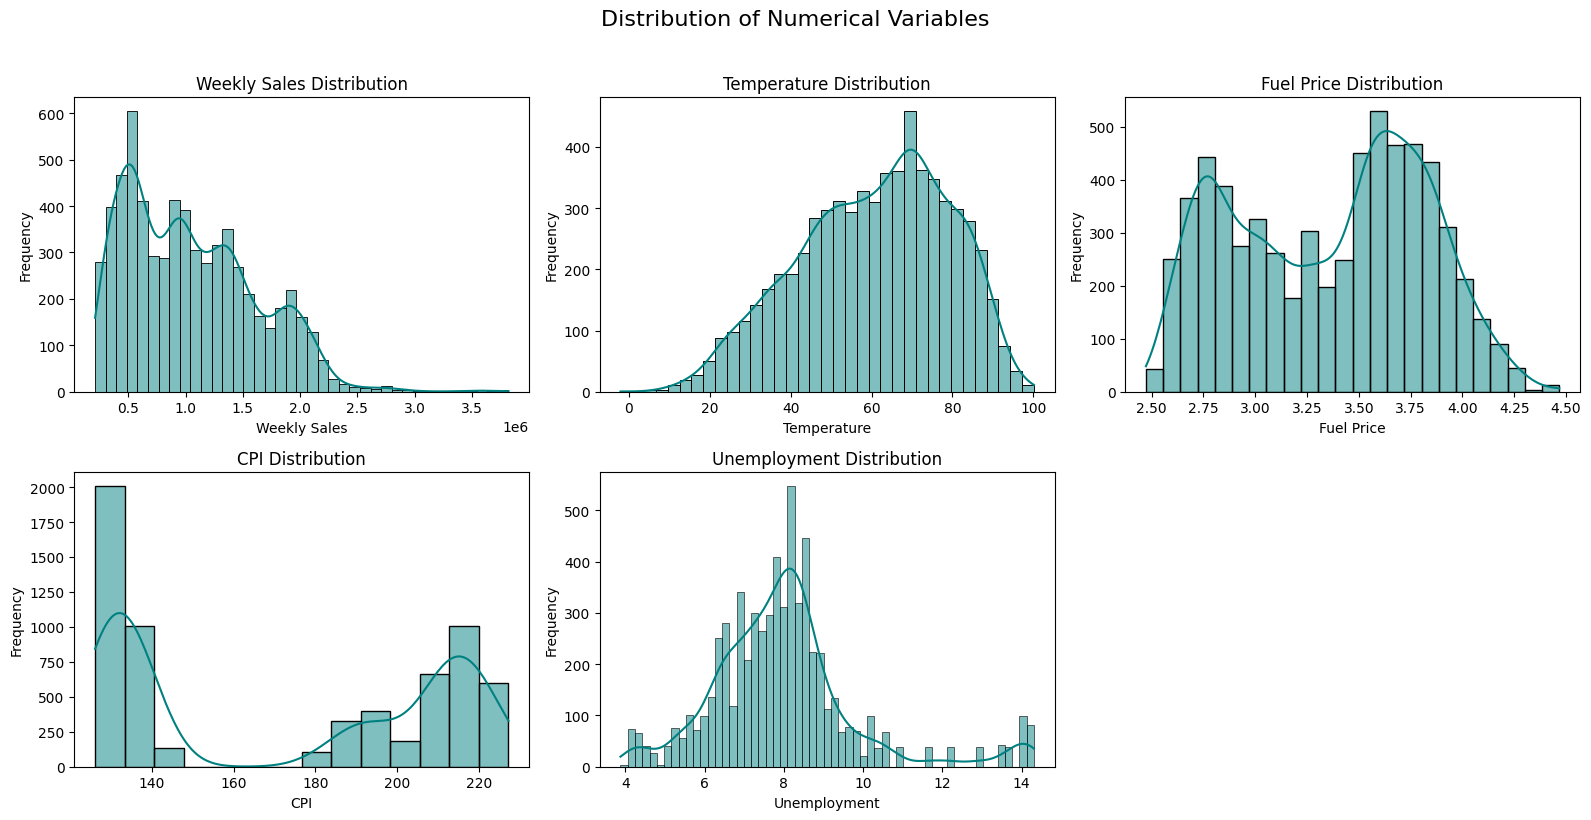

In [ ]:
# Categorical Variable Analysis
plt.figure(figsize=(16, 12))

# Centered and Larger Title
plt.suptitle('Categorical Variable Analysis', fontsize=16, y=1.02)

# First Line: Distribution of Year, Month, and Holiday_Flag
plt.subplot(2, 3, 1)
sns.countplot(x='Year', data=df, color='teal')
plt.title('Distribution of Year')

plt.subplot(2, 3, 2)
sns.countplot(x='Month', data=df, color='teal')
plt.title('Distribution of Month')

plt.subplot(2, 3, 3)
sns.countplot(x='Holiday_Flag', data=df, color='teal')
plt.title('Distribution of Holiday_Flag')

# Second Line: Distribution of Day and WeekOfYear
plt.subplot(2, 3, 4)
sns.countplot(x='Day', data=df, color='teal')
plt.title('Distribution of Day')
plt.xticks(range(0, 32, 5))  # Show every 5th tick for Day

plt.subplot(2, 3, 5)
sns.countplot(x='WeekOfYear', data=df, color='teal')
plt.title('Distribution of WeekOfYear')
plt.xticks(range(0, 53, 10))  # Show every 10th tick for WeekOfYear

# Adjust layout for the first part
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Histograms (combine all in one figure)
plt.figure(figsize=(16, 8))

# Second Plots Title
plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

plt.subplot(2, 3, 1)
sns.histplot(df['Weekly_Sales'], kde=True, color='teal')
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(df['Temperature'], kde=True, color='teal')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(df['Fuel_Price'], kde=True, color='teal')
plt.title('Fuel Price Distribution')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(df['CPI'], kde=True, color='teal')
plt.title('CPI Distribution')
plt.xlabel('CPI')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(df['Unemployment'], kde=True, color='teal')
plt.title('Unemployment Distribution')
plt.xlabel('Unemployment')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


Insight into dataset's temporal (time), economic and seasonal dynamics:

2011 appears to have more data points and could be due to information gathered covers 2010-02-05 to 2012-11-01. April and July indicates higher peaks. Days 2-6, 10-13, 16-21, 23-27, 30 have higher counts. Weekly sales peak around 0.5 million with a right tail suggesting occasional high sales figures (special events or promotions or outliers). There are more occurrences at lower temperatures in the dataset (lower than 70). Fuel price has two peaks which suggest a possible change in price over time.  CPI has a peak at ~75 and at ~218 showing varying consumer price index levels; it's at 0 around 145-175 suggesting stability. Unemployment peaks at around 9 with lower values surrounding suggesting variation in the rates.

Friday is the only day in the plot. This could be that sales data is recorded weekly on Fridays and we will disregard it/drop it as there's no insightful information.

In [ ]:
print(df.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear', 'Week', 'Season'],
      dtype='object')


###Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Drop 'Day' and 'Season'
df = df.drop(columns=['Day', 'Season', 'Week'])

# Separate features and target variable
X = df.drop(['Weekly_Sales', 'Date'], axis=1)  # Drop target variable and Date as it was converted
y = df['Weekly_Sales']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler Scale due to algorithm sensitivity and training stability
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SelectKBest with f_regression scoring
selector = SelectKBest(score_func=f_regression, k=5)

# Fit selector to training data
X_train_selected = selector.fit_transform(X_train, y_train)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get feature names
selected_features = X.columns[selected_indices]

# Print selected feature names
print("Selected features from SelectKBest:", selected_features)
print()

# Calculate variance of each feature
variances = df.drop(['Weekly_Sales', 'Date'], axis=1).var()

# Set a threshold for variance
variance_threshold = 0.2

# Filter features based on variance threshold
selected_features_variance = variances[variances >= variance_threshold].index.tolist()

print("Selected Features based on Variance Threshold:")
print(selected_features_variance)
print()

# Separate features and target variable
X = df.drop(['Weekly_Sales', 'Date'], axis=1)  # Adjust columns as needed
y = df['Weekly_Sales']

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances from Random Forest:")
print(feature_importances)
print()

# Perform ANOVA F-test
f_values, p_values = f_regression(X, y)

anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'p-Value': p_values})
anova_results = anova_results.sort_values(by='F-Value', ascending=False)

print("ANOVA F-test Results:")
print(anova_results)
print()

Selected features from SelectKBest: Index(['Store', 'CPI', 'Unemployment', 'Month', 'WeekOfYear'], dtype='object')

Selected Features based on Variance Threshold:
['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'WeekOfYear']

Feature Importances from Random Forest:
Store           0.667944
CPI             0.154562
Unemployment    0.100412
WeekOfYear      0.050200
Temperature     0.012382
Fuel_Price      0.008788
Month           0.002835
Year            0.001452
Holiday_Flag    0.001426
dtype: float64

ANOVA F-test Results:
        Feature     F-Value        p-Value
0         Store  815.022439  6.883078e-169
5  Unemployment   73.348421   1.344837e-17
7         Month   37.514784   9.607839e-10
8    WeekOfYear   35.624738   2.519662e-09
4           CPI   34.118717   5.438293e-09
2   Temperature   26.300448   3.007648e-07
1  Holiday_Flag    8.766881   3.078699e-03
6          Year    2.173377   1.404665e-01
3    Fuel_Price    0.576212   4.478287e-01



Based on the collective selection tests, Store appears crucial for predicting as it's highest rated and highest F-Value 815.02. CPI, Unemployment, Month and WeekOfYear also appear to provide insight to predictive power.

###Data Preparation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature selection results
selected_features = ['Store', 'CPI', 'Unemployment', 'Month', 'WeekOfYear']

# Identifying the Target
target = 'Weekly_Sales'

# Use only selected features
X = df[selected_features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform only X_train
X_test_scaled = scaler.transform(X_test)        # Transform X_test using the same scaler


# Print out to confirm
print("Selected Features:")
print(selected_features)
print()
print(f"Target: {target}")
print()
print("Data Preparation Completed:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Selected Features:
['Store', 'CPI', 'Unemployment', 'Month', 'WeekOfYear']

Target: Weekly_Sales

Data Preparation Completed:
Training set size: 5148 samples
Testing set size: 1287 samples


###Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Instantiate the regressors
lin_reg = LinearRegression()
rf_regressor = RandomForestRegressor(random_state=42)
gb_regressor = GradientBoostingRegressor(random_state=42)
svm_regressor = SVR()

# Train and evaluate each model
def train_and_evaluate_regressor(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    print(f"{type(model).__name__}:")
    print(f"Train - MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R^2: {train_r2:.4f}, MAPE: {train_mape:.2f}%")
    print(f"Test  - MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R^2: {test_r2:.4f}, MAPE: {train_mape:.2f}%")
    print()

# Train and evaluate each regressor
train_and_evaluate_regressor(lin_reg, X_train_scaled, X_test_scaled, y_train, y_test)
train_and_evaluate_regressor(rf_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
train_and_evaluate_regressor(gb_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
train_and_evaluate_regressor(svm_regressor, X_train_scaled, X_test_scaled, y_train, y_test)



LinearRegression:
Train - MAE: 428497.5192, MSE: 271679091076.6869, RMSE: 521228.4442, R^2: 0.1444, MAPE: 60.90%
Test  - MAE: 432116.8811, MSE: 274264941758.9879, RMSE: 523703.1046, R^2: 0.1487, MAPE: 60.90%

RandomForestRegressor:
Train - MAE: 21069.9115, MSE: 1503698254.1883, RMSE: 38777.5483, R^2: 0.9953, MAPE: 1.99%
Test  - MAE: 60673.6236, MSE: 12544950401.0270, RMSE: 112004.2428, R^2: 0.9611, MAPE: 1.99%

GradientBoostingRegressor:
Train - MAE: 119220.2869, MSE: 26280754221.3325, RMSE: 162113.3993, R^2: 0.9172, MAPE: 15.66%
Test  - MAE: 122724.7969, MSE: 28190607117.0402, RMSE: 167900.5870, R^2: 0.9125, MAPE: 15.66%

SVR:
Train - MAE: 461854.2387, MSE: 324874121544.5919, RMSE: 569977.2991, R^2: -0.0232, MAPE: 60.34%
Test  - MAE: 471097.9187, MSE: 331299142656.9703, RMSE: 575585.9125, R^2: -0.0284, MAPE: 60.34%




| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **LinearRegression** |||||
| MAE | 428,497.52 | 432,116.88 | Average prediction error | Weak predictive performance. High errors and low R². Not recommended. |
| MSE | 271,679,091,076.689 | 274,264,941,758.99 | Average squared prediction error | Weak predictive performance. High errors and low R². Not recommended. |
| RMSE | 521,228.44 | 523,703.10 | Root of average squared prediction error | Weak predictive performance. High errors and low R². Not recommended. |
| R² | 0.1444 | 0.1487 | Variance explained by model | Weak predictive performance. High errors and low R². Not recommended. |
| MAPE | 60.90% | 60.90% | Percentage of error | Weak predictive performance. High errors and low R². Not recommended. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **RandomForestRegressor** |||||
| MAE | 21,069.91 | 60,673.62 | Average prediction error | Strong performance. Low errors and high R². Recommended. |
| MSE | 1,503,698,254.19 | 12,544,950,401.03 | Average squared prediction error | Strong performance. Low errors and high R². Recommended. |
| RMSE | 38,777.55 | 112,004.24 | Root of average squared prediction error | Strong performance. Low errors and high R². Recommended. |
| R² | 0.9953 | 0.9611 | Variance explained by model | Strong performance. Low errors and high R². Recommended. |
| MAPE | 1.99% | 1.99% | Percentage of error | Strong performance. Low errors high R². Recommended. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **GradientBoostingRegressor** |||||
| MAE | 119,220.29 | 122,724.80 | Average prediction error | Good performance. Low errors and high R². Recommended. |
| MSE | 26,280,754,221.33 | 28,190,607,117.04 | Average squared prediction error | Good performance. Low errors and high R². Recommended. |
| RMSE | 162,113.40 | 167,900.59 | Root of average squared prediction error | Good performance. Low errors and high R². Recommended. |
| R² | 0.9172 | 0.9125 | Variance explained by model | Good performance. Low errors and high R². Recommended. |
| MAPE | 15.66% | 15.66% | Percentage of error | Strong performance. Low errors high R². Recommended. |

| Metric Name | Train Value | Test Value | Notes | Interpretation |
|-------------|-------------|------------|-------|----------------|
| **SVR** |||||
| MAE | 461,854.24 | 471,097.92 | Average prediction error | Poor performance. High errors and negative R². Not recommended. |
| MSE | 32,4874,121,544.59 | 331,299,142,656.97 | Average squared prediction error | Poor performance. High errors and negative R². Not recommended. |
| RMSE | 569,977.30 | 575,585.91 | Root of average squared prediction error | Poor performance. High errors and negative R². Not recommended. |
| R² | -0.0233 | -0.0284 | Variance explained by model | Poor performance. High errors and negative R². Not recommended. |
| MAPE | 60.34% | 60.34% | Percentage of error | Weak predictive performance. High errors and low R². Not recommended. |

Conclusion: We will proceed with RandomForestRegressor and GradientBoostingRegressor, due to better performance.


###Hyperparameter Tuning

RandomForestRegressor using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter grid with reduced ranges
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# Instantiate the RandomizedSearchCV object with reduced n_iter and cv
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=2, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {-random_search.best_score_}")

# Extract the best model from RandomizedSearchCV for RandomForestRegressor
best_rf = random_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test)

# Calculate MAE, MSE, RMSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # Calculate RMSE from MSE

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate MAPE (optional)
absolute_errors_rf = np.abs((y_test - y_pred_rf) / y_test)
mape_rf = np.mean(absolute_errors_rf) * 100

# Print out the metrics
print("Metrics for RandomForestRegressor:")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")
print(f"MAPE: {mape_rf:.2f}%")



Fitting 2 folds for each of 50 candidates, totalling 100 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 127}
Best Score: 64915.77955647178
Metrics for RandomForestRegressor:
MAE: 59430.7507
MSE: 11915201984.6596
RMSE: 109156.7771
R²: 0.9630
MAPE: 5.53%


GradientBoostingRegressor using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

# Define the parameter grid with reduced ranges
param_dist = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instantiate the model
gbr = GradientBoostingRegressor(random_state=42)

# Instantiate the RandomizedSearchCV object with reduced n_iter and cv
random_search = RandomizedSearchCV(estimator=gbr, param_distributions=param_dist,
                                   n_iter=50, cv=2, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {-random_search.best_score_}")


# Extract the best model from RandomizedSearchCV
best_gbr = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_gbr.predict(X_test)

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE from MSE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f"Metrics for GradientBoostingRegressor:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


Fitting 2 folds for each of 50 candidates, totalling 100 fits
Best Parameters: {'learning_rate': 0.18726788295647254, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 116}
Best Score: 53921.36091531413
Metrics for GradientBoostingRegressor:
MAE: 47121.3911
MSE: 6681388736.7212
RMSE: 81739.7623
R²: 0.9793
MAPE: 4.79%


The GradientBoostingRegressor outperforms the RandomForestRegressor across evaluated metrics (MAE, MSE, RMSE, R², MAPE). It shows lower errors, higher R squared and lower MAPE indicating better predictive performance and accuracy.

Even though we have an incomplete set of historical data, this model has the ability to generalize the data that is available in order to gain insights into potential markdown strategies. It will assist in the crucial decision making about promotional planning.



Cross-validation of Tuned Gradient Boosting Regressor:

In [ ]:
from sklearn.model_selection import cross_val_score

# Extract the best model from RandomizedSearchCV
best_gbr = random_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(best_gbr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validation scores and their mean
print(f"Cross-validation MAE scores: {-cv_scores}")
print(f"Mean cross-validation MAE: {-cv_scores.mean()}")


# Make predictions on the test set
y_pred = best_gbr.predict(X_test)

# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE from MSE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f"Metrics for GradientBoostingRegressor:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

Cross-validation MAE scores: [49471.55732526 46238.54625343 49727.92288108 49527.70057389
 44824.46336909]
Mean cross-validation MAE: 47958.03808054983
Metrics for GradientBoostingRegressor:
MAE: 47121.3911
MSE: 6681388736.7212
RMSE: 81739.7623
R²: 0.9793
MAPE: 4.79%


The Gradient Boosting Regressor achieved a mean cross-validation MAE of 47958.04 across five folds. On the test set, it produced an MAE of 47121.39, an MSE of 6681388736.72, an RMSE of 81739.76, an R² of 0.9793, and a MAPE of 4.79%. These results indicate a strong model performance with high predictive accuracy and a good fit to the data.

**Example prediction**: sales during Thanksgiving and Christmas months with simluated markdowns.

In [ ]:
# Parse the 'Date' column as datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define features
selected_features = ['Store', 'CPI', 'Unemployment', 'Month', 'WeekOfYear']

# Prepare data with holiday indicators
# Initialize new colum Super_Bowl in df; df['Date'].apply(lambda x: ...) accesses Date column of df and applies function to each x
# where x represents a date in Date column; lambda function (anonymous unction checks if month of date is Febrary and week is 5) if yes set to 1 else set to 0
df['Super_Bowl'] = df['Date'].apply(lambda x: 1 if (x.month == 2 and x.week == 5) else 0)
df['Labor_Day'] = df['Date'].apply(lambda x: 1 if (x.month == 9 and x.week == 36) else 0)
df['Thanksgiving'] = df['Date'].apply(lambda x: 1 if (x.month == 11 and x.week == 47) else 0)
df['Christmas'] = df['Date'].apply(lambda x: 1 if (x.month == 12 and x.week == 52) else 0)

# Define feature matrix X and target variable y
X = df[selected_features + ['Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']]
y = df['Weekly_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (using the best model found by RandomizedSearchCV)
best_gbr = GradientBoostingRegressor(n_estimators=120, learning_rate=0.2, max_depth=5, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', random_state=42)
best_gbr.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_gbr.predict(X_test)
print("Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print()

# Simulate markdown scenarios
# Example: Increase markdown percentage during Thanksgiving and Christmas
X_test['Markdown_Thanksgiving'] = X_test['Thanksgiving'] * 1.5  # Simulate 50% higher markdown during Thanksgiving
X_test['Markdown_Christmas'] = X_test['Christmas'] * 1.5        # Simulate 50% higher markdown during Christmas

# Select only the features used during training
X_test_selected = X_test[selected_features + ['Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']]

# Predict under each scenario and analyze results
predicted_sales_thanksgiving = best_gbr.predict(X_test_selected)
predicted_sales_christmas = best_gbr.predict(X_test_selected)

# Compare predicted sales under different markdown scenarios
print("Predicted Sales Increase during Thanksgiving Month:")
print(predicted_sales_thanksgiving)
print("\nPredicted Sales Increase during Christmas Month:")
print(predicted_sales_christmas)

# Define the range of indices to plot
start_index = 0
end_index = 49


Model Evaluation:
Mean Squared Error: 11708027746.814932
R^2 Score: 0.9636571104925173

Predicted Sales Increase during Thanksgiving Month:
[1112585.03333005 1388171.0638954  1843815.54417032 ...  766884.0424729
 1927382.33158147  855798.09071882]

Predicted Sales Increase during Christmas Month:
[1112585.03333005 1388171.0638954  1843815.54417032 ...  766884.0424729
 1927382.33158147  855798.09071882]


The R squared 96.37% suggests this model captures a large portion of the variance in weekly sales and can effectively explain the relationship between the selected features and sales. The numbers in the array [] are the predicted sales increases. The difference in MSE and R2 from this and the prior tuned is the added features of Super_Bowl, Labor_Day, Thanksgiving, Christmas.

**Plot comparison of actual sales with the predictions.**

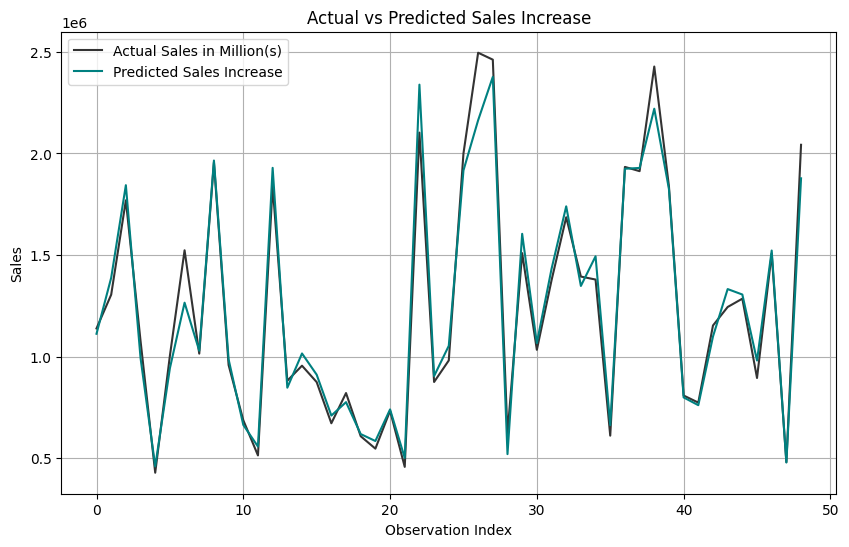

In [ ]:

# Plot actual sales (teal line) and predicted sales increase during Christmas (black line)
plt.figure(figsize=(10, 6))
plt.plot(range(start_index, end_index), y_test.iloc[start_index:end_index], color='#333333', label='Actual Sales in Million(s)')
plt.plot(range(start_index, end_index), predicted_sales_christmas[start_index:end_index], color='teal', label='Predicted Sales Increase')
plt.xlabel('Observation Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales Increase')
plt.legend()
plt.grid(True)
plt.show()

The overall trend in the plot shows consistent alignment between predicted and actual sales increases, suggesting that the model is performing well.

**Predict demand for Christmas**

Metrics for Baseline GradientBoostingRegressor:
MAE: 122633.1162
MSE: 28178945436.9260
RMSE: 167865.8555
R²: 0.9125


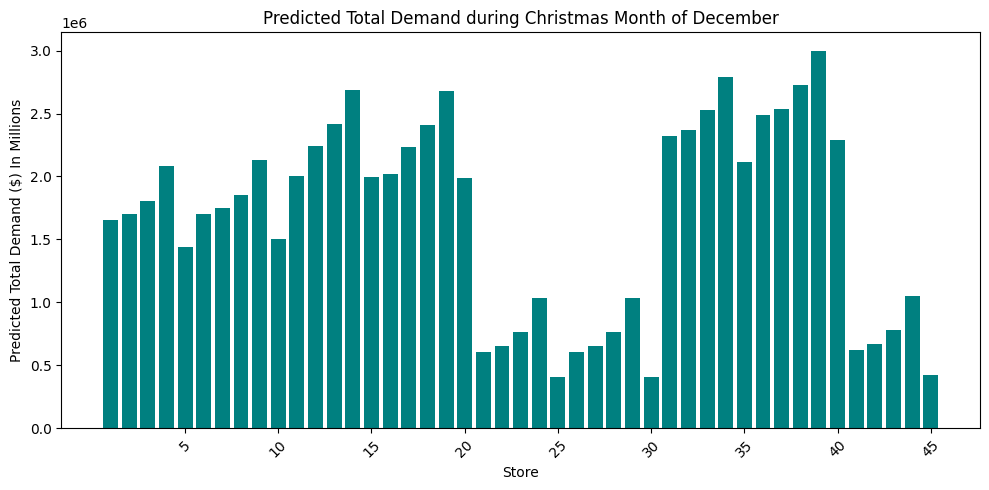

In [ ]:
# Ensure the DataFrame contains data for all 45 stores
all_stores = df['Store'].unique()
assert len(all_stores) == 45, "The number of unique stores is not 45."

# Select features and target
selected_features = ['Store', 'CPI', 'Unemployment', 'Month', 'WeekOfYear']
X = df[selected_features]
y = df['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predict baseline weekly sales for all stores
y_pred_baseline = model.predict(X_test)

# Predict the increase in sales during Christmas for all stores
X_christmas = df[df['Month'] == 12][selected_features]
predicted_sales_increase_christmas = model.predict(X_christmas)

# Combine baseline and increase predictions for total demand
total_demand_christmas = np.concatenate((y_pred_baseline[:len(predicted_sales_increase_christmas)], predicted_sales_increase_christmas))

# Print metrics
mae = mean_absolute_error(y_test, y_pred_baseline)
mse = mean_squared_error(y_test, y_pred_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_baseline)

print("Metrics for Baseline GradientBoostingRegressor:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Get store IDs and predicted demand
store_ids = df['Store'].unique()
predicted_demand_christmas = predicted_sales_increase_christmas[:len(store_ids)]  # Adjust the length if needed

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(store_ids, predicted_demand_christmas, color='teal')
plt.xlabel('Store')
plt.ylabel('Predicted Total Demand ($) In Millions')
plt.title('Predicted Total Demand during Christmas Month of December')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])  # Set x-axis ticks
plt.tight_layout()

plt.show()


MAE 122,633.12 indicates on average the model predictions are off from actual sales by ~122,633.12.<br>
MSE 28,178,945,436.93 reflects model's prediction variances.<br>
RMSE 167,865.86 measures error in units (sales dollars).<br>
R squared 0.9125 ~91.25% of the variance in weekly sales can be explained by the model.

This estimates how much of the expected consumer demand will convert into sales based on the preditive model analysis of features and historical data. This prediction may help the business anticipate and plan for sales volume exptected to achieve during Christmas; here we used the month of December.

##Summary of Findings

- **Dataset Overview:**
  - The dataset includes historical sales data for 45 Walmart stores across various regions from 2010-02-05 to 2012-11-01. It contains economic factors, holiday information, and promotional markdown events that may affect sales. The goal is to develop a model to improve sales and demand prediction accuracy, optimizing inventory management, staffing, and marketing strategies.

- **Key Insights:**

  - **Sales Trends:**
    - **Seasonal Peaks:** Peak sales are initially observed in April to July. Upon further review, the absence of January 2010 and December 2012 data means these conclusions should be cautiously interpreted.
    - **Overall Sales Impact:** Despite the absence of January 2010 and December 2012 data, historical sales trends in December 2010 and 2011 show significant peaks, indicating the importance of this month for sales.

  - **Year 2010 Analysis (Feb 5 - Dec 31)**:
    - **Holiday Impact:** Average weekly sales during holidays were $1,112,358.88 compared to 1,054,879.56 on non-holidays.
    - **Seasonal Sales:** Spring had the highest total sales of 652,883,374.15.
    - **Monthly Sales:** December had the highest total sales of 288,760,532.72.
    - **Top Performing Store:** Store 14 had the highest total sales of 105,462,242.38.

  - **Year 2011 Analysis**:
    - **Holiday Impact:** Average weekly sales during holidays were 1,148,530.48 compared to 1,037,715.06 on non-holidays.
    - **Seasonal Sales:** Fall had the highest total sales of 643,374,965.69.
    - **Monthly Sales:** December had the highest total sales of 288,078,102.48.
    - **Top Performing Store:** Store 4 had the highest total sales of 111,092,293.33.

  - **Year 2012 Analysis (Jan 1 - Nov 1):**
    - **Holiday Impact:** Average weekly sales during holidays were 1,092,660.75 compared to 1,030,782.33 on non-holidays.
    - **Seasonal Sales:** Summer had the highest total sales of 655,536,260.24.
    - **Monthly Sales:** June had the highest total sales of 240,610,329.29.
    - **Top Performing Store:** Store 4 had the highest total sales of 92,771,189.24.

  - **Overall Analysis:**
    - **Holiday Impact:** There is a consistent observed effect of holidays on increasing weekly sales across the years.
    - **Seasonal Trends:** Overall, Spring, Fall, and Summer are identified as peak seasons for sales.
    - **Monthly Peaks:** December shows consistently high sales in 2010 and 2011, indicating a strong seasonal trend despite missing December 2012 data.
    - **Top Performing Stores:** Store 14 in 2010 and Store 4 in 2011 and 2012 are identified as high-performing stores, suggesting potential areas for resource allocation and strategy development.

- **Feature Importance:**

  - Based on selection tests, key predictive features are:
    - Store
    - CPI
    - Unemployment
    - Month
    - WeekOfYear

##Model Evaluation and Selection

- **Model Performance:**
  - **Linear Regression:** Weak predictive performance with high errors and low R². Not recommended.
  - **Random Forest Regressor:** Strong performance with low errors and high R². Recommended.
  - **Gradient Boosting Regressor:** Good performance with low errors and high R². Recommended.
  - **Support Vector Regressor (SVR):** Poor performance with high errors and negative R². Not recommended.

- **Model Selection Rationale:**
  - **Gradient Boosting Regressor after Hyperparameter Tuning:** Showed the best performance with:
    - **Mean Squared Error (MSE):** 6681388736.7212
    - **R² Score:**  0.9793
    - **MAPE:**  4.79%
    - **Sales Predictions during Christmas:** Predicted sales increases were analyzed, showing a strong predictive capability.
  - **Predictions:**
    - The Gradient Boosting Regressor model accurately predicts sales increases during specified time frame. With the simulation of markdown scenarios, the model can forecast the impact of promotions and holiday-specific consumer behavior on sales. This capability empowers the business to proactively adjust inventory, staffing, promotional strategies for optimal perormance during high-demand periods.

##Implications and Recommendations

- **Business Insights:**
  - **Inventory Management:** Identified seasonal peaks and holiday impacts can help Walmart optimize inventory levels, ensuring sufficient stock during high-demand periods.
  - **Staffing and Promotions:** Understanding peak seasons and high-performing stores can guide staffing decisions and targeted marketing strategies, enhancing operational efficiency.
  - **Store Performance:** Focus on top-performing stores to identify and replicate successful strategies across other locations.

##Limitations and Future Directions:
- **Study Limitations:**
  - **Data Gaps:** Missing January 2010 and December 2012 data may slightly impact the overall seasonal trend analysis, but the historical data from December 2010 and 2011 provides valuable insights.
  - **Scope and Size:** Further validation with more recent data could improve the model's robustness and generalizability.

- **Future Research Directions:**
  - **Advanced Techniques:** Exploring additional machine learning techniques or ensemble methods could further enhance predictive accuracy.
  - **Real-time Modeling:** Integrating real-time predictive modeling with business intelligence systems could offer enhanced decision support for retail management.
